In [6]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [7]:
url = "http://bit.ly/w-data"
score_data = pd.read_csv(url)
score_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
score_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
score_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
score_data.shape

(25, 2)

In [11]:
score_data.columns


Index(['Hours', 'Scores'], dtype='object')

In [12]:
score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [13]:
score_data.isnull()


,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


<AxesSubplot:>

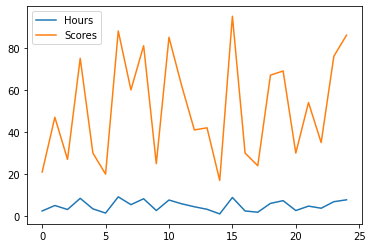

In [14]:
score_data.plot()

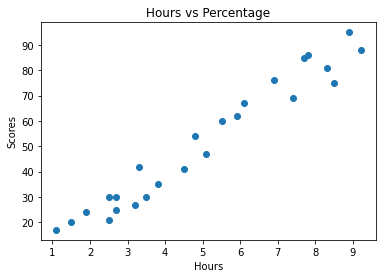

In [15]:
plt.scatter(score_data['Hours'],score_data['Scores'])
plt.title('Hours vs Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.show()

In [20]:
x = score_data[['Hours']]
y = score_data.drop('Hours',axis = 1)

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
x_train.shape,x_test.shape

((20, 1), (5, 1))

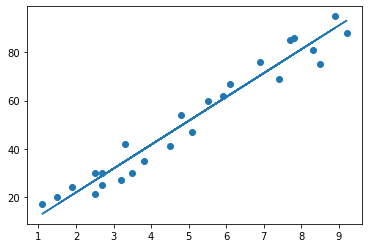

In [25]:
#importing linear regression
from sklearn.linear_model import LinearRegression  

#instantiate the model
model = LinearRegression()

#fit the model
model.fit(x_train,y_train)

# Plotting the regression line
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [26]:
#prediction using model
y_train_prediction = model.predict(x_train)
y_test_prediction = model.predict(x_test)

#calculating accuracy ofa model
acc_train = model.score(x_train,y_train)
acc_test = model.score(x_test,y_test)

from sklearn.metrics import mean_squared_error

#calculating Root Mean Squared Error
rms_train = np.sqrt(mean_squared_error(y_train,y_train_prediction))
rms_test = np.sqrt(mean_squared_error(y_test,y_test_prediction))

print("LINEAR REGRESSION MODEL: ")
print("\nAccuracy of Training Dataset: ",acc_train)
print("\nAccuracy of Testing Dataset: ",acc_test)
print("\nRMSE of Training Dataset: ",rms_train)
print("\nRMSE of Testing Dataset: ",rms_test)

LINEAR REGRESSION MODEL: 

Accuracy of Training Dataset:  0.9515510725211552

Accuracy of Testing Dataset:  0.9454906892105356

RMSE of Training Dataset:  5.558613350226342

RMSE of Testing Dataset:  4.6474476121003665


In [27]:
#checking actual and predicted value
predicted = y_test_prediction[:,0]
actual = np.array(y_test['Scores'])
df_dict = {"Actual":actual,"Predicted":predicted}
df = pd.DataFrame(df_dict)
df.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0.5, 1.0, '(Hours vs Score)')

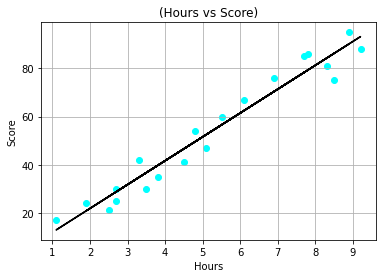

In [28]:
#plotting results for training data
plt.scatter(x_train,y_train,color = "cyan")
plt.plot(x_train,y_train_prediction,color = "black")
plt.grid(True)
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("(Hours vs Score)")

Text(0.5, 1.0, '(Hours vs Score)')

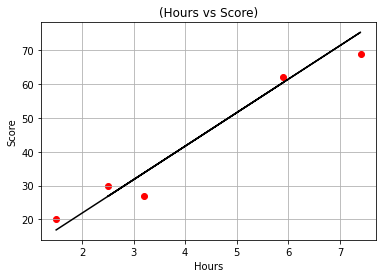

In [29]:
#plotting results for testing data
plt.scatter(x_test,y_test,color = "red")
plt.plot(x_test,y_test_prediction,color = "black")
plt.grid(True)
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("(Hours vs Score)")

In [30]:
#prediction of score of students if he studies for 9.25 hrs/day

output = model.predict([[9.25]])
print(f"The Score of student is {output[0][0]} if he studies for 9.25 hrs/day")

The Score of student is 93.69173248737538 if he studies for 9.25 hrs/day


In [31]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_prediction))

Mean Absolute Error: 4.183859899002975
